In [114]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [10]:
from sklearn.datasets import load_diabetes

In [11]:
diabetes=load_diabetes()

In [12]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [100]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [17]:
df=pd.DataFrame(diabetes['data'],columns=diabetes['feature_names'])

In [19]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [22]:
diabetes['target_filename']

'diabetes_target.csv.gz'

In [38]:
from sklearn.preprocessing import RobustScaler
scalar=RobustScaler()

In [39]:
scalar_data=scalar.fit_transform(df)

In [40]:
pd.DataFrame(scalar_data,columns=diabetes.feature_names)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.433735,1.0,1.053498,0.380952,-0.637363,-0.514954,-0.571429,0.000,0.332756,-0.271186
1,-0.096386,0.0,-0.674897,-0.285714,-0.065934,-0.254876,1.257143,-0.500,-1.010659,-1.491525
2,1.060241,1.0,0.790123,0.000000,-0.659341,-0.504551,-0.400000,0.000,0.073253,-0.406780
3,-1.253012,0.0,-0.065844,-0.428571,0.263736,0.478544,-0.457143,0.500,0.375136,-0.135593
4,0.000000,0.0,-0.444444,0.380952,0.131868,0.322497,0.228571,0.000,-0.457413,-0.745763
...,...,...,...,...,...,...,...,...,...,...
437,0.481928,1.0,0.411523,0.904762,-0.021978,0.020806,-0.342857,0.000,0.504562,0.135593
438,-0.144578,1.0,-0.131687,-0.857143,0.857143,1.378414,-0.342857,0.500,-0.246196,0.745763
439,0.481928,1.0,-0.131687,0.317460,-0.527473,-0.166450,-0.285714,-0.115,-0.684081,0.271186
440,-0.674699,0.0,0.707819,0.095238,0.329670,0.317295,-0.342857,0.395,0.707591,-0.406780


In [41]:
from sklearn.decomposition import PCA

In [42]:
pca=PCA(2)

In [43]:
pca

PCA(n_components=2)

In [44]:
pca.fit(scalar_data)

PCA(n_components=2)

In [45]:
x_pca=pca.transform(scalar_data)

In [46]:
scalar_data.shape

(442, 10)

In [47]:
x_pca.shape

(442, 2)

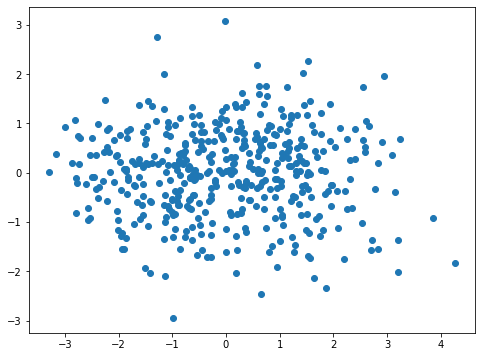

In [104]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])

In [106]:
df_comp=pd.DataFrame(pca.components_,columns=diabetes.feature_names)

In [107]:
df_comp

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.178368,0.106194,0.305471,0.234771,0.391255,0.411232,-0.267033,0.380588,0.380384,0.354174
1,0.001333,0.158696,0.266113,0.169979,-0.555407,-0.497016,-0.508559,0.076001,0.129480,0.196031


<AxesSubplot:>

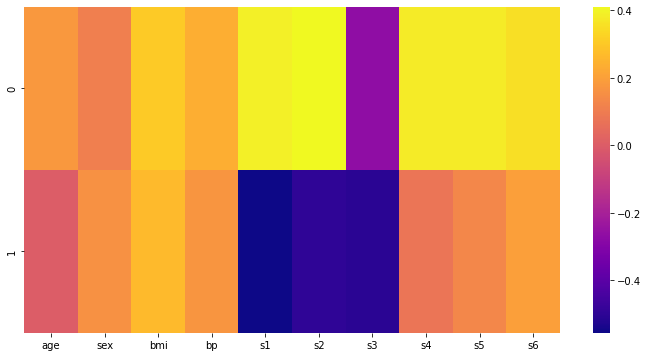

In [115]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')